___
# Atividade: Regressão Linear Simples
___

## Aula 24

## Contexto Teórico / Prático com dados do GapMinder


**Preparo Prévio:**
1. Montogmery e Runger. Capítulo 11 - Regressão Linear Simples
1. Magalhães e Lima, seção 9.5. Regressão Linear Simples


Referência: http://www.statsmodels.org/dev/diagnostic.html

Referência: [http://connor-johnson.com/2014/02/18/linear-regression-with-python/](http://connor-johnson.com/2014/02/18/linear-regression-with-python/)


**Hoje:**
1. Entender o conceito de regressão linear

___

___
## Renda vs CO2

Foram coletados dois dados do site https://www.gapminder.org/:
1. Emissão de CO2 per capita
1. Renda per capita (via proxy do PIB per capita)

As linhas representam os países e as colunas representam o ano. 

Como os arquivos estão separados, será preciso juntá-los cruzando o país.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
#Leitura dos arquivos em Excel
co2 = pd.read_excel('indicator CDIAC carbon_dioxide_emissions_per_capita.xlsx')
income = pd.read_excel('indicator gapminder gdp_per_capita_ppp.xlsx')

In [3]:
#É possível verificar que cada linha representa um país e as colunas representam o ano
co2.head(3)

,CO2 per capita,1751,1755,1762,1763,1764,1765,1766,1767,1768,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.03678,0.04709,0.068312,0.131602,0.213325,0.262174,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#O mesmo se aplica a renda.
income.head(3)

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


___
### Inner Join (LEMBRAM?!)

Vamos agora juntar as duas tabelas via país, selecionar apenas o ano de 2010 e remover os NaNs.

Ao final vamos fazer o gráfico de dispersão das duas variáveis.

**Sugestão**: pesquise sobre a função DataFrame.join(), pode ser muito útil no futuro.

In [5]:
#Cruza as duas tabelas via país
co2.set_index('CO2 per capita', inplace=True)
income.set_index('GDP per capita', inplace=True)

df = co2.join(income, how='inner', lsuffix='_co2', rsuffix='_income')

#Seleciona o ano de 2010 e remove os NaNs
df = df[['2010_co2','2010_income']].dropna()

#Transforma a renda na escala de milhares de dólares
df['2010_income'] /= 1000


## IMPORTANTE:

**Ideia/Problema/Objetivo** aqui é explicar/prever a emissão de gás carbono (CO2) per capita de um país via renda (PIB) per capita.

Por conta disso, vamos considerar CO2 como variável dependente (eixo y) e renda como explicativa (eixo x).

In [6]:
x = df['2010_income']
y = df['2010_co2']

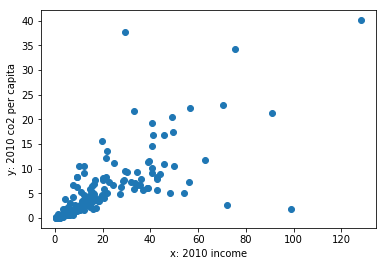

In [7]:
plt.scatter(x,y);
plt.xlabel("x: 2010 income");
plt.ylabel("y: 2010 co2 per capita");

___
# Regressão linear simples

Vamos tentar agora ajustar um modelo sobre os dados. A primeira tentativa será ajustar um reta:

$$y_i=\beta_0+\beta_1x_i+\epsilon_i$$


Esse modelo é muito parecido com o visto na Aula 06, com algumas mudanças:
1. Agora utilizaremos $\beta_i$ para se referir aos coeficientes do modelo de regressão.
1. Existe um termo $\epsilon_i$ para representar os **erros aleatórios**. O erro aleatório tem média zero e variância (desconhecida) $\sigma^2$. Além disso, esses erros aleatórios correspondentes as diferentes observações são também considerados variáveis aleatórias não correlacionadas. Vide Montegomery e Runger (2018), Seção 11-2, página 335.

O primeiro passo agora é calcular os valores da regressão. Existem diversas formas de estimar os $\beta$s, vamos utilizar o método de **Mínimos Quadrados Ordinários (MQO ou OLS - Ordinary Least Squares em inglês)**. 

$$\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}$$

$$\hat{\beta}_1=\frac{S_{XY}}{S_{XX}}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$



**Obs: Veja o arquivo `demonstracao_betas.pdf` publicado no Blackboard para entender a obtenção dos estimadores de $\beta_0$ e $\beta_1$.**

___
### Tarefa 1 - $\hat{\beta}_1$ e  $\hat{\beta}_0$

Calcule os valores de $\bar{x}$ e $\bar{y}$. Calcule também $S_{XX}$ e $S_{XY}$, em seguida calcule as estimativas $\hat{\beta}_1$ e $\hat{\beta}_0$

In [8]:
#LEMBRANDO
x = df['2010_income']
y = df['2010_co2']

#beta^0 e beta^1
yb = y.mean()
xb = x.mean()

Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()

b1 = Sxy/Sxx
b0 = yb - b1*xb

print("beta0: {0}".format(b0))
print("beta1: {0}".format(b1))


beta0: 0.6557309117836843
beta1: 0.24326849086184094


## Verificando os resultados do ajuste linear graficamente:



Vamos contrastar os resultados previstos pela regressão com os dados.

In [9]:
#Valores CRIADOS para x a partir da amplitudade da variável explicativa x da base de dados
x_v = np.linspace(x.min(), x.max(), 500)

#Valores PREVISTOS para y a partir de uma lista de valores CRIADOS para x
y_v = b0 + b1*x_v

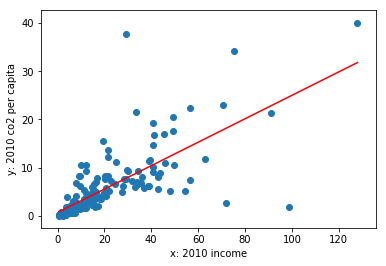

In [10]:
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("x: 2010 income");
plt.ylabel("y: 2010 co2 per capita");

___
### Tarefa 2 - Resíduos 

Agora calcular o vetor de resíduos usando os valores observados para $y$ e os valores previstos para $y$ a partir dos dados observados.


Ou seja, calcular:
$$e_i=y_i-(\hat{\beta}_0+\hat{\beta}_1x_i)$$

**Verifique a normalidade dos resíduos. Parece uma Normal?**

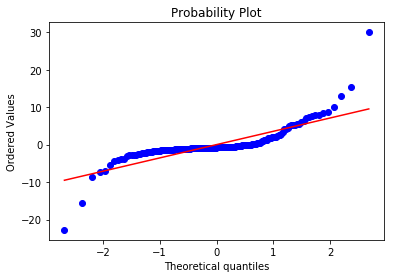

In [11]:
e = y - (b0 + b1*x) # Escreva sua fórmula dos resíduos aqui

stats.probplot(e, dist='norm', plot=plt); # Verifique graficamente  se é uma normal - como fazer isso?

___
## Ajustando um modelo de regressão simples via `statsmodels.OLS`

___
### Teste de hipóteses para os coeficientes 

Agora que já aprendemos Teste de Hipóteses, podemos verificar a significância dos $\beta$'s e para tal vamos testar:

$$H_0: \beta_i=0$$
$$H_1: \beta_i\neq0$$

com $i=0$ e $i=1$. A **significância da regressão** está na rejeição de $H_0: \beta_1=0$.


 Verifique o **valor-p** para os $\beta$'s e verifique se rejeitamos ou não $H_0$. Utilize $\alpha=5\%$ (na prática, é usual adotar qualquer nível de significância de até $10\%$, ou seja, $\alpha=10\%$). 
 
 Verifique os resultados da regressão e responda depois da seção abaixo.

___
## Usando `statsmodels.OLS`

Agora que estão familiarizados com algumas medidas, Rode a função OLS() da biblioteca statsmodel e interprete:

In [12]:
import numpy as np
import statsmodels.api as sm


xc = sm.add_constant(x)
model = sm.OLS(y,xc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               2010_co2   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     235.2
Date:                Tue, 07 May 2019   Prob (F-statistic):           9.80e-35
Time:                        11:42:13   Log-Likelihood:                -534.72
No. Observations:                 186   AIC:                             1073.
Df Residuals:                     184   BIC:                             1080.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6557      0.423      1.551      0.123      -0.178       1.490
2010_income     0.2433      0.016     15.337      0.000       0.212       0.275
==============================================================================
Omnibus:                      100.299   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2384.399
Skew:                           1.435   Prob(JB):                         0.00
Kurtosis:                      20.304   Cond. No.                         35.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

___
### Tarefa 3 - Plot da reta ajustada

Usando os resultados da equação obtida via `statsmodels`, plote novamente a reta ajustada sobre os pontos

In [13]:
#Valores CRIADOS para x a partir da amplitudade da variável explicativa x da base de dados
x_v = np.linspace(x.min(), x.max(), 500)
x_vc = sm.add_constant(x_v) #Monta matriz de planejameno com a coluna de 1s

#Valores PREVISTOS para y a partir de uma matriz de planejamento x_vc
y_vc = results.predict(x_vc)

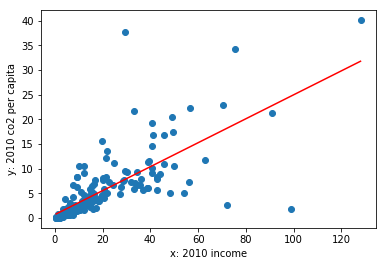

In [14]:
plt.scatter(x,y) #plot dos dados
plt.plot(x_v, y_vc, color="r") #plot da reta
plt.xlabel("x: 2010 income");
plt.ylabel("y: 2010 co2 per capita");

### Resíduos

Plot da normalidade dos resíduos. O mesmo plot dos resíduos que foi feito acima pode ser facilitado se usarmos o atributo `resid` dos resultados da regressão.

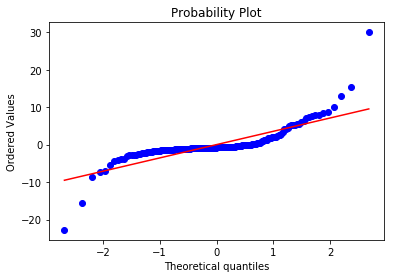

In [15]:
stats.probplot(results.resid, dist="norm", plot=plt);

___
### Tarefa 4: 

Você consegue interpretar alguns dos resultados acima? Você acha que os resíduos formam uma normal? Fale um pouco sobre a homocedasticidade do modelo.

**R.: **

De acordo com o formato dos dados (pontos azuis) em relação a linha reta (vermelha) no plot de normalidade dos resíduos (gráfico construído na Tarefa 3), temos indicativos de caudas mais leves nos dados do que as caudas da distribuição normal. Vide Montgmory e Runger (2018), Seção 6-6, página 185, para mais detalhes.

Para validar, descritivamente, a suposição de homocedasticidade, pode-se utilizar o plot da reta ajustada sobre os pontos (primeiro gráfico apresentado na Tarefa 3). Esse gráfico mostra que a variabilidade da variável **y: 2010 co2 per capita** em torno da reta ajustada aumenta conforme aumenta os valores da variável **x: 2010 income** e essa disposição dos pontos pode ser um indicativo de que a suposição de homocedasticidade não seja válida nesse ajuste. 

___
# Resumo dos testes da regressão obtidos via `statsmodels.OLS`


Os resumo dos resultados da regressão traz informações que nos permitem avaliar a qualidade do ajuste e a validade de:

* Validação das suposições (normalidade, homocedasticidade e independência dos resíduos)
* Teste de hipóteses dos coeficientes do modelo de regressão 


### Teste t :  valor *p*  da estatística t

Existente para cada coeficiente $\beta_i$ do modelo de regressão, testam as seguintes hipóteses:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Um valor-p baixo permite **rejeitar** a hipótese $H_0: \beta_i = 0$. No caso de um modelo de regressão simples, as hipóteses para o coeficiente $\beta_1$ dizem sobre a significância da regressão (inclinação da reta ajustada ser significante).



### Coeficiente de determinação $R^2$

É uma medida de quão bem uma regressão capta a variação presente nos dados, ou parafraseando, o quanto de variabilidade nos dados é explicada pelo modelo de regressão.


$$ R^2 = 1 - \frac{SS_E}{SS_T}$$


Para calcular esta fórmula precisamos das relações:

$$SQRes=SS_{E}=\sum\limits^{n}_{i=1}(y_i-\hat{y}_i)^2=\sum\limits_{i=1}^{n}\epsilon^2_{i}$$


$$SQT=SS_{T}=\sum\limits^{n}_{i=1}(y_i-\bar{y})^2$$




### $R^2$ ajustado

Penaliza preditores que não acrescentam poder preditivo significativo. Essa medida é útil em modelo de regressão múltipla.

$$R^2ajustado = R^2 - (1-R^2)\frac{P}{n-p-1}$$

em que $n$ é o número de dados e $p$ é o número de preditores (número de variáveis explicativas)



### Estatística F (se há mais do que uma variável explitacativa no modelo)

Testa as seguintes hipóteses:

$H_0: \beta_1 = \beta_2 = \ldots = \beta_p = 0$

$H_1: \beta_i \neq 0$ para no mínimo algum $i$, com $i=1,\ldots,n$ 

A rejeição da hipótese nula implica que no mínimo uma variável explicativa (regressora) contruibui significantemente para o modelo. Esse teste F é mais útil no caso de modelo de regressão múltipla.


### Teste Omnibus

Teste a normalidade dos resíduos:

Se **Prob(Omnibus)** for muito baixo, existe evidência de que os resíduos **não são** distribuídos normalmente, violando nesse caso a suposição do modelo de regressão.


### Teste Jarque-Bera

Outro teste de normalidade dos resíduos:

$H_0:$ a distribuição dos resíduos é normal

$H_1:$ a distribuição dos resíduos não é normal

Se **Prob(JB)** for muito baixo, existe evidência de que os resíduos **não são** distribuídos normalmente, violando nesse caso a suposição do modelo de regressão.



### Teste Durbin-Watson

Testa autocorrelação dos resíduos.

Varia na faixa $[0, 4]$

* Um valor próximo de $2$ sugere que não há autocorrelação dos resíduos
* Um valor menor que $2$ sugere **correlação positiva** dois resíduos
* Um valor maior que $2$ sugere **correlação negativa** dois resíduos


___
### Tarefa 5 - Análise dos valores-p

O que os valores-p da regressão dizem a respeito dos $\beta$'s?*

**R.:**

A coluna **P>|t|** obtida do comando `results.summary()` indica o resultado do valor-p de cada coeficiente do modelo de regressão. No caso, seu resultado mostra se a variável regressora é relevante para explicar a variável dependente quando o valor-p é baixo. 

Considerando a saida acima, há suficiente evidência de que a variável **2010_income** é relevante ao modelo, ou seja, há evidência de que $\beta_1$ é diferente de zero dando significância ao modelo de regressão.

___
### Tarefa 6 - Análise da estatística F

O que o valor da estatística F diz sobre a qualidade da regressão? 

Diga qual hipótese nula e alternativa $Prob(F)$ avalia

**R.:**

No caso da aplicação aqui feita ser de regressão simples (uma única variável explicativa), as hipóteses do teste F se resumem a:

$H_0: \beta_1 = 0$

$H_1: \beta_1 \neq 0$

ou seja, o teste F se reduz ao teste t no caso de um modelo de regressão simples.

Considerando o resultado de **Prob (F-statistic)** descrito na saida do `results.summary()`, temos evidência de rejeita a hipótese nula acima como era de se esperar pela conclusão obtida no teste t anterior.

___
### Tarefa 7 - Análise do $R^2$

O que o valor de $R^2$ obtido diz sobre o poder explicativo da regressão obtida via OLS?

**R.:**

Considerando o resultado de **R-squared** descrito na saida do `results.summary()`, temos que o modelo explica $56,1\%$ da variabilidade dos dados. Entretanto é importante ter cuidado ao interpretar essa medida ainda mais no caso que notamos, descritivamente, a possível não adequação da suposição de homocedasticidade. Isso pode, por exemplo, fornecer previsões não necessariamente exatas de futuras previsões.

___
### Tarefa 8 - Análise de normalidade do resíduo

O que os testes *Omnibus* e *Jarque-Bera* dizem a respeito da normalidade do resíduo? A conclusão coincide com a análise gráfica da normalidade dos resíduos feita na **Tarefa 4**?

**R.:**

Tanto pelo resultado de **Prob(Omnibus)** como do **Prob(JB)** mostram valores *p* extremamente pequenos, menores do que $<0,001$. Nesse caso, pode-se concluir que não há evidências de normalidade dos resíduos.

___
### Tarefa 9 - Análise de homocedasticidade

Verifique visualmente se a hipótese de homocedasticidade é válida. Veja slides da Aula para entender quais gráficos podem ser feitos.

**R.: **

A resposta da **Tarefa 4** discute sobre o assunto. A seguir, apresenta-se outra maneira considerando os resíduos obtidos do modelo ajustado.

Para validar, descritivamente, indicativos na suposição de homocedasticidade considerando os resíduos obtidos do modelo ajustado, pode ser feito gráficos dos resíduos $e_i=y_i-\hat{y}_i$ contra os valores preditos $\hat{y}_i$ e contra cada variável independente $x_i$, com $i=1,\ldots,n$. Vide Montgmory e Runger (2018), Seção 11-7.1, página 351, para mais detalhes.

Interprentando os gráficos abaixo, nota-se que a variância dos resíduos está crescendo com a magnitiude de $y_i$ e com a magnitude de $x_i$ dando indicativo que a suposição de homocedasticidade deva estar violada. Uma solução pode ser a transformação nas variáveis dependente e/ou independentes ou usar modelos de regressão mais robustos. 

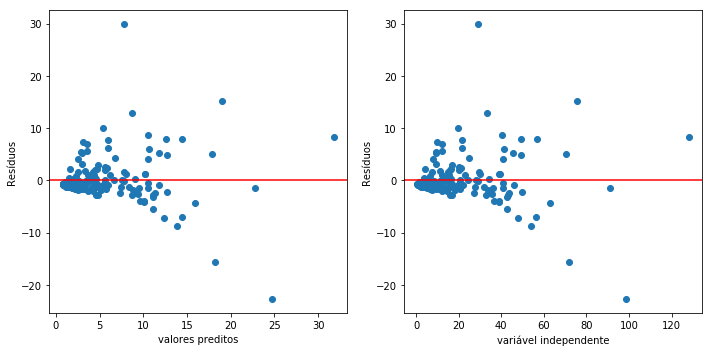

In [16]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(results.predict(xc),results.resid); #xc contem matriz de planejamento usada no ajuste OLS 
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('Resíduos')
plt.xlabel('valores preditos')

plt.subplot(122)
plt.scatter(x,results.resid); #x contem apenas a variável independente utilizada no ajuste linear
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('Resíduos')
plt.xlabel('variável independente')

plt.tight_layout()
plt.show()